# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import IPython as ipd
import librosa
import librosa.display
from IPython.display import Audio
import os

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

from matplotlib.pyplot import specgram
import glob 
import os
from tqdm import tqdm
import IPython.display as ipd 



# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Load Data</p></div>

In [2]:
import os

# Define the directory paths and their corresponding labels
directories = {
    "Music Emotion": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion",
    "Anger": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Anger",
    "Fear": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Fear",
    "Happiness": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Happiness",
    "Interest": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Interest",
    "Sadness": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Sadness"
}

# Loop through the directories and list their contents
for label, directory in directories.items():
    files = os.listdir(directory)
    for file in files:
        print(f"{label}-{os.path.join(label, file)}")


Music Emotion-Music Emotion/Fear
Music Emotion-Music Emotion/Interest
Music Emotion-Music Emotion/Sadness
Music Emotion-Music Emotion/Happiness
Music Emotion-Music Emotion/Anger
Anger-Anger/01-02 anger 2-5.wav
Anger-Anger/01-02 anger 1-5.wav
Anger-Anger/1-20  anger-1-5.wav
Anger-Anger/01-01 anger 4-5.wav
Anger-Anger/1-20  anger-2-5.wav
Anger-Anger/01-02 anger 3-5.wav
Anger-Anger/01-01 anger 1-5.wav
Anger-Anger/01-02 anger 4-5.wav
Anger-Anger/01-01 anger 2-5.wav
Fear-Fear/1-4 fear-4-5.wav
Fear-Fear/1-23 fear-2-5.wav
Fear-Fear/1-4 fear-3-5.wav
Fear-Fear/1-4 fear-2-5.wav
Fear-Fear/1-23 fear-1-5.wav
Fear-Fear/1-4 fear-1-5.wav
Happiness-Happiness/1-45 happiness.wav
Happiness-Happiness/1-11 happiness-1-5.wav
Happiness-Happiness/1-41 happiness-1-5.wav
Happiness-Happiness/1-17 happiness-2-5.wav
Happiness-Happiness/1-7 happines-1-5.wav
Happiness-Happiness/1-11 happiness-2-5.wav
Happiness-Happiness/1-17 happiness-1-5.wav
Happiness-Happiness/1-7 happiness-2-5.wav
Interest-Interest/1-2 interest-1-

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Data Visualization📊</p></div>

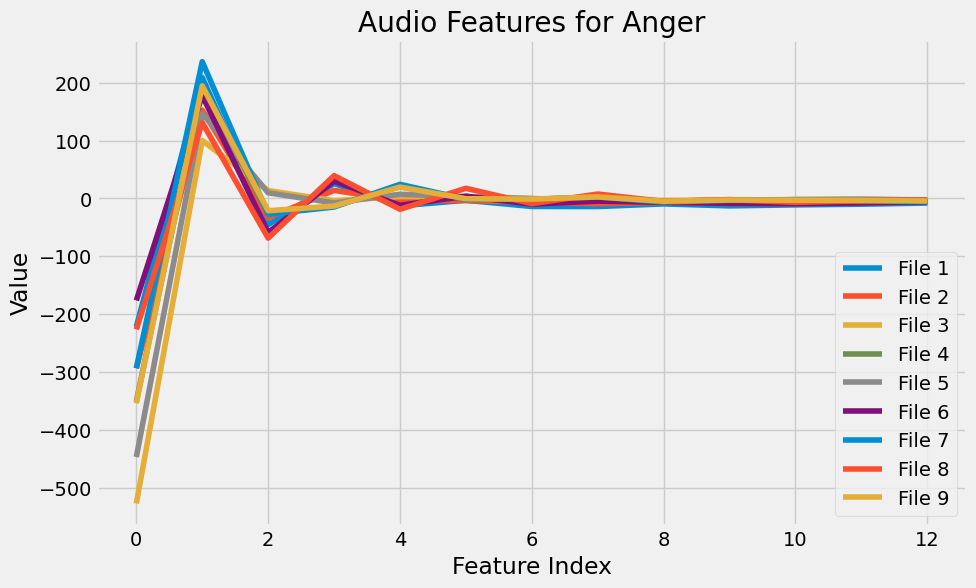

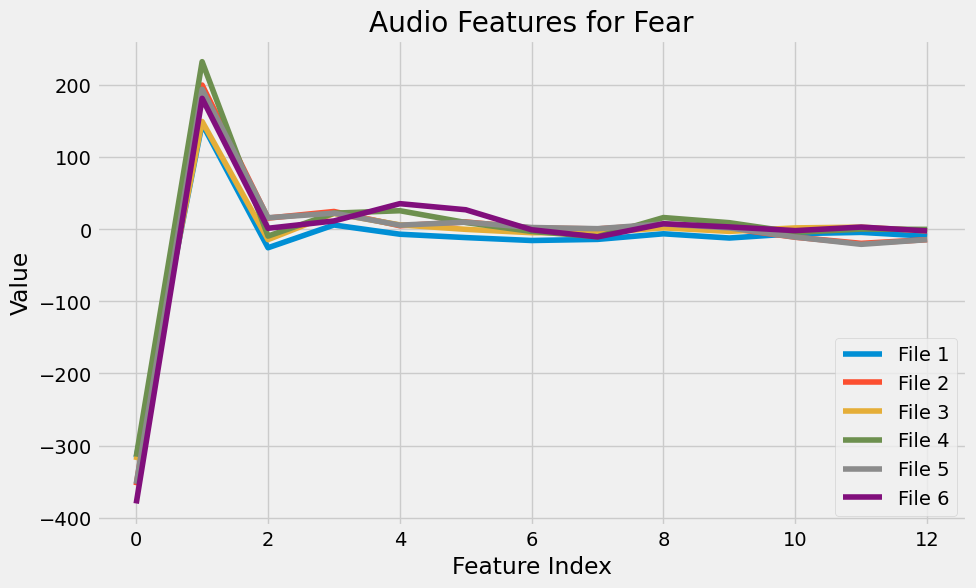

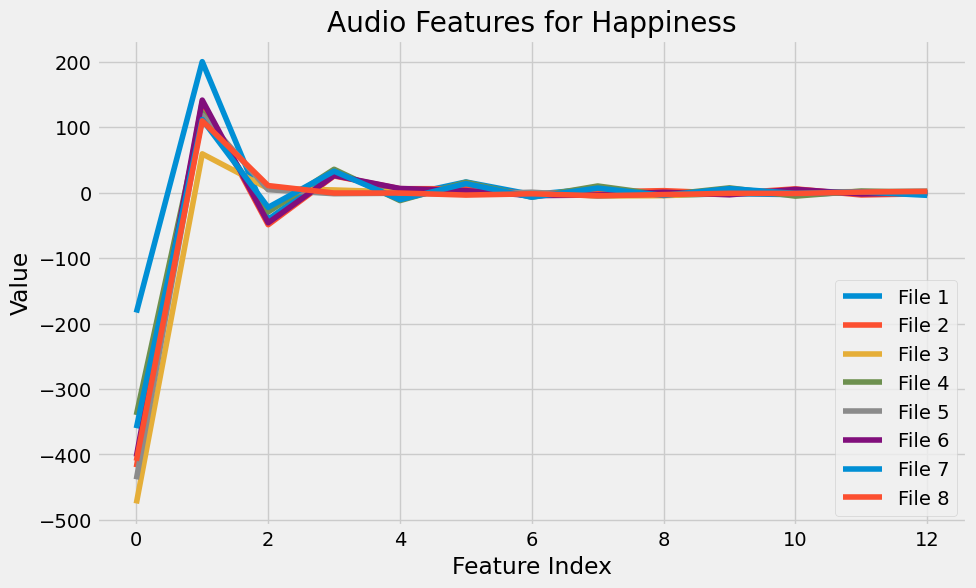

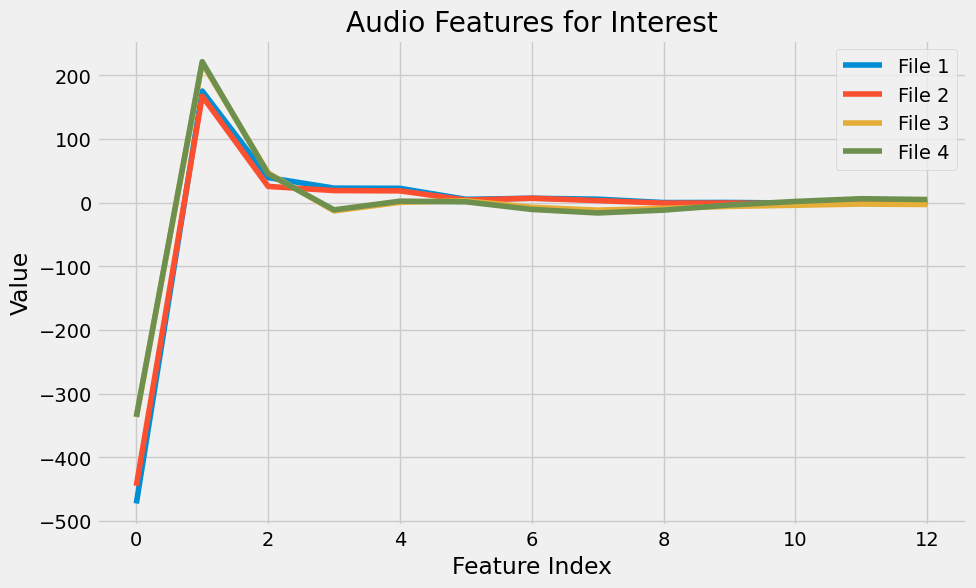

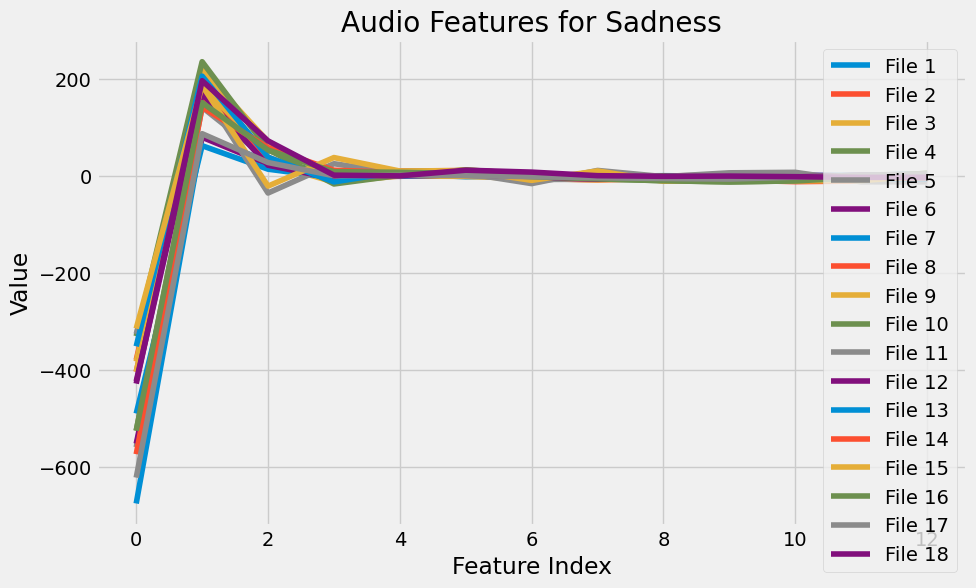

In [3]:
import os
import librosa
import numpy as np

# Function to extract audio features
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    feature = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13), axis=1)
    return feature

# Define the directory paths and their corresponding labels
directories = {
    "Anger": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Anger",
    "Fear": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Fear",
    "Happiness": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Happiness",
    "Interest": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Interest",
    "Sadness": "/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Sadness"
}

# Create a dictionary to store features by emotion category
emotion_features = {
    "Anger": [],
    "Fear": [],
    "Happiness": [],
    "Interest": [],
    "Sadness": []
}

# Populate the dictionary with features
for emotion, directory in directories.items():
    # Loop through the files in the directory
    for file_name in os.listdir(directory):
        # Combine the directory path and file name
        file_path = os.path.join(directory, file_name)
        
        # Extract features and append to the corresponding category
        features = extract_features(file_path)
        emotion_features[emotion].append(features)

# Create unique visualizations for each emotion category
for emotion, features in emotion_features.items():
    plt.figure(figsize=(10, 6))
    for i, feature in enumerate(features):
        plt.plot(feature, label=f'File {i+1}')
    plt.title(f'Audio Features for {emotion}')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Augmentation Method</p></div>

**Augmentation methods** are techniques used to enhance or modify data, often in the context of machine learning. In tasks like image or audio recognition, augmentation involves applying controlled transformations to existing data samples. This helps to increase the diversity and variability of the dataset, which in turn improves the model's ability to generalize and perform well on unseen data. For instance, in image recognition, augmentation might involve tasks like rotating, flipping, or adjusting the brightness of images. In audio processing, it could include techniques like adding noise, changing pitch, or altering speed.

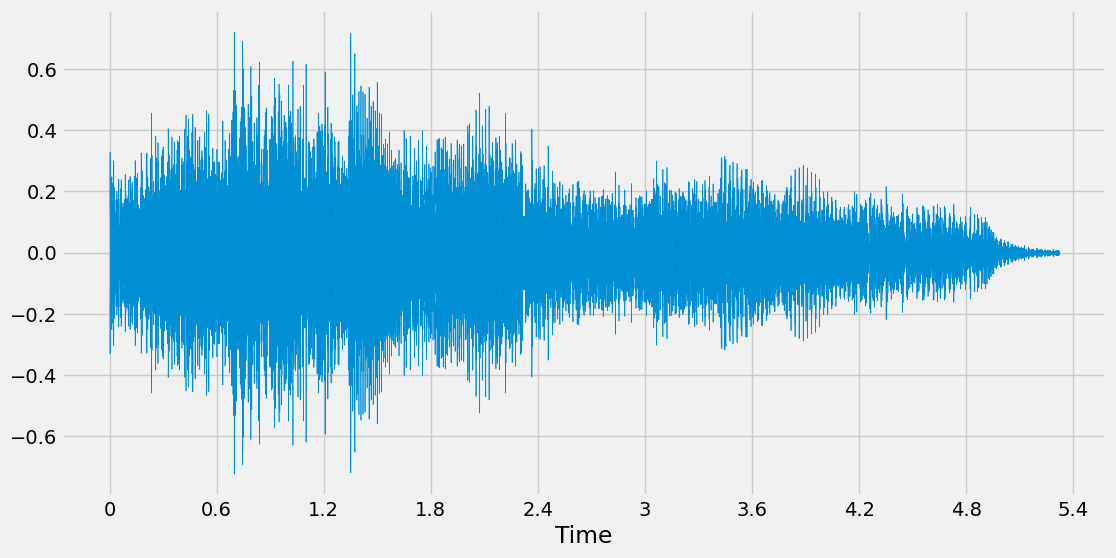

In [4]:
fname = '/kaggle/input/music-and-animal-basic-emotions/rh3hrp4pnj-1/Music Emotion/Sadness/1-1 sadness-1-5.wav'
data, sampling_rate = librosa.load(fname)
librosa.display.waveshow(data, sr = sampling_rate)

# Audio
ipd.Audio(data, rate = sampling_rate)

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Static/White Noise</p></div>

**Static or white noise** is a random signal that contains equal intensity across all frequencies. It is a random sequence of data points with no discernible pattern, often heard as a continuous hissing or shushing sound. In other words, it lacks specific information or structure and is characterized by its uniform distribution of energy in the frequency spectrum.

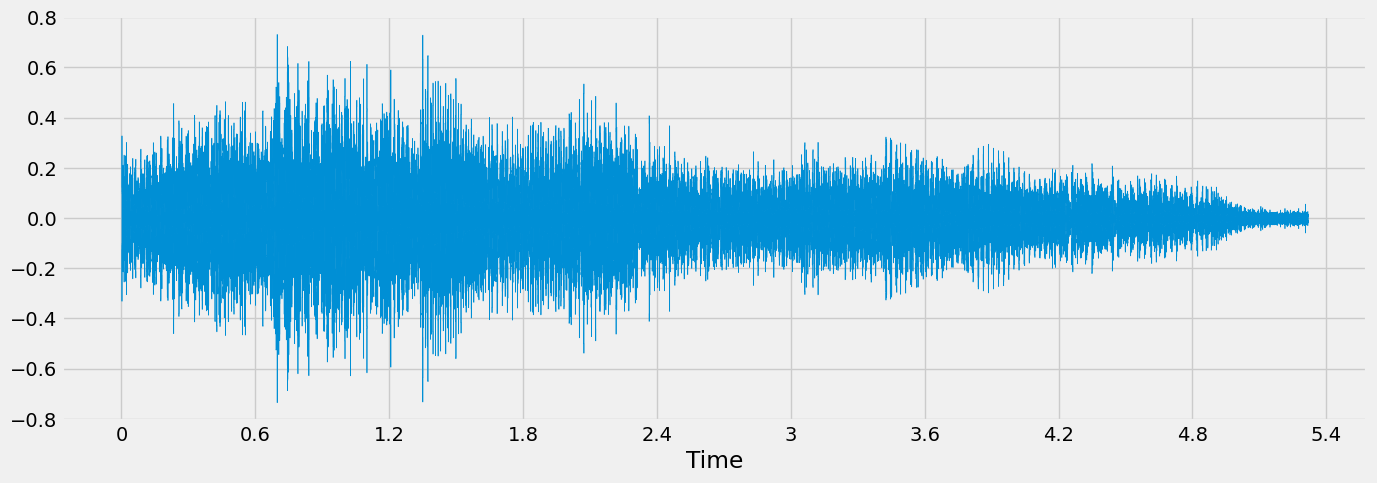

In [5]:
def noise(data):
    """
    Adding White Noise
  
    """
    noise_amp = 0.05 * np.random.uniform() * np.random.normal(size = data.shape[0])
    # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size = data.shape[0])
    return data

x = noise(data)
plt.figure(figsize = (15, 5))
librosa.display.waveshow(x, sr = sampling_rate)

ipd.Audio(x, rate = sampling_rate)

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Shift</p></div>

Shift, in the context of data augmentation, refers to a technique where the elements of a dataset are moved by a fixed amount. For example, in image processing, this could involve shifting pixels horizontally or vertically. In audio processing, it might involve altering the timing of sound samples. This operation helps the model become more robust to variations in position or timing, as it learns to recognize features regardless of their exact placement within the data.

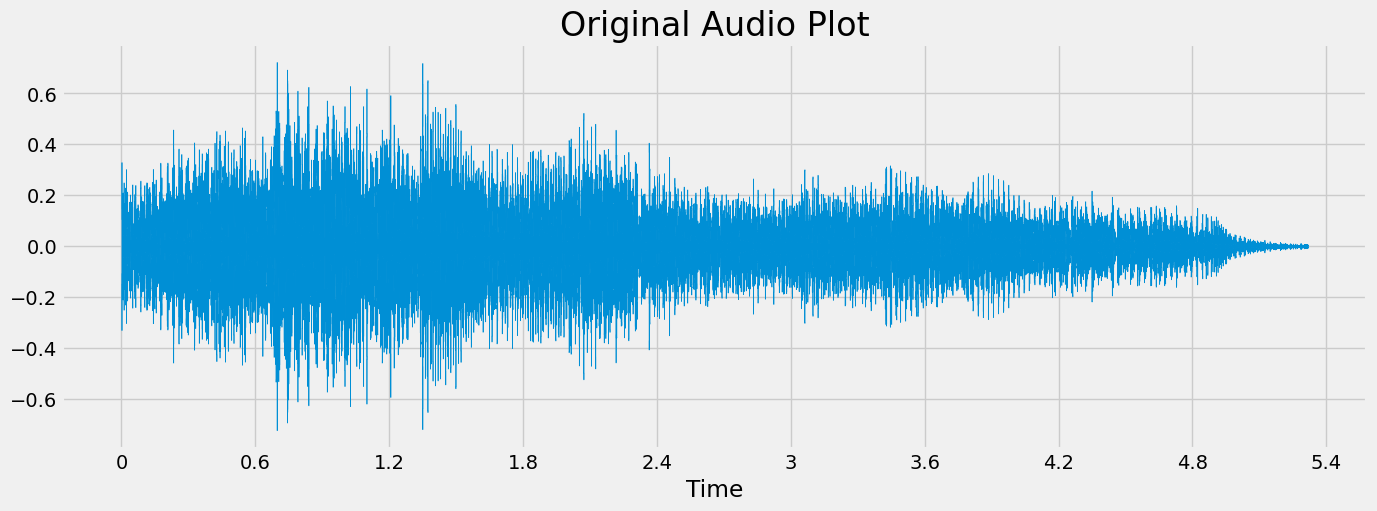

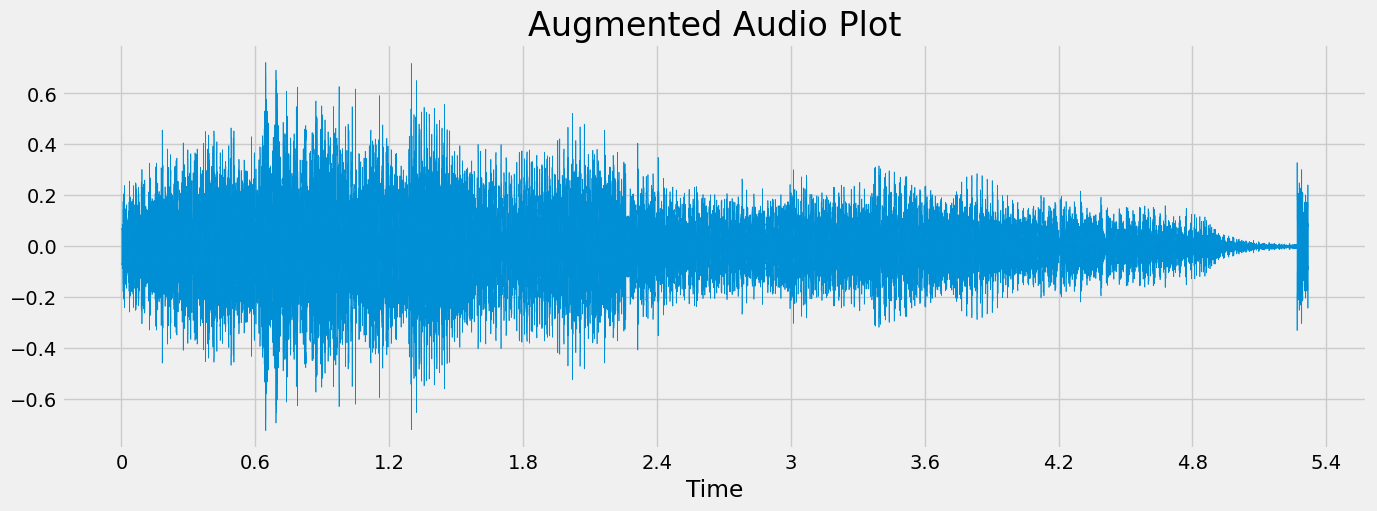

In [6]:
def shift(data):
    """
    Random shifting
   
    """
    s_range = int(np.random.uniform(low = -5, high = 5)*1000)
    return np.roll(data, s_range)


x = shift(data)
plt.figure(figsize = (15, 5))
# orginial plot
librosa.display.waveshow(data, sr = sampling_rate)
plt.title('Original Audio Plot', size = 24)
plt.show()
plt.figure(figsize = (15, 5))
librosa.display.waveshow(x, sr = sampling_rate)
plt.title('Augmented Audio Plot', size = 24)
plt.show()
ipd.Audio(x, rate = sampling_rate)

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Pitch</p></div>

**Pitch** refers to the perceived frequency of a sound wave, which determines how high or low we perceive a sound to be. A higher frequency corresponds to a higher pitch, while a lower frequency corresponds to a lower pitch. For example, a whistle produces a high-pitched sound, while a drum produces a low-pitched sound.

In musical terms, pitch is what allows us to differentiate between musical notes. It plays a crucial role in music theory and is an essential element in creating melodies, harmonies, and chords.

In the context of audio processing, pitch shifting involves modifying the pitch of a sound without changing its duration. This can be done to achieve creative effects in music production or to adjust the pitch of a recording to match a specific key or musical context.

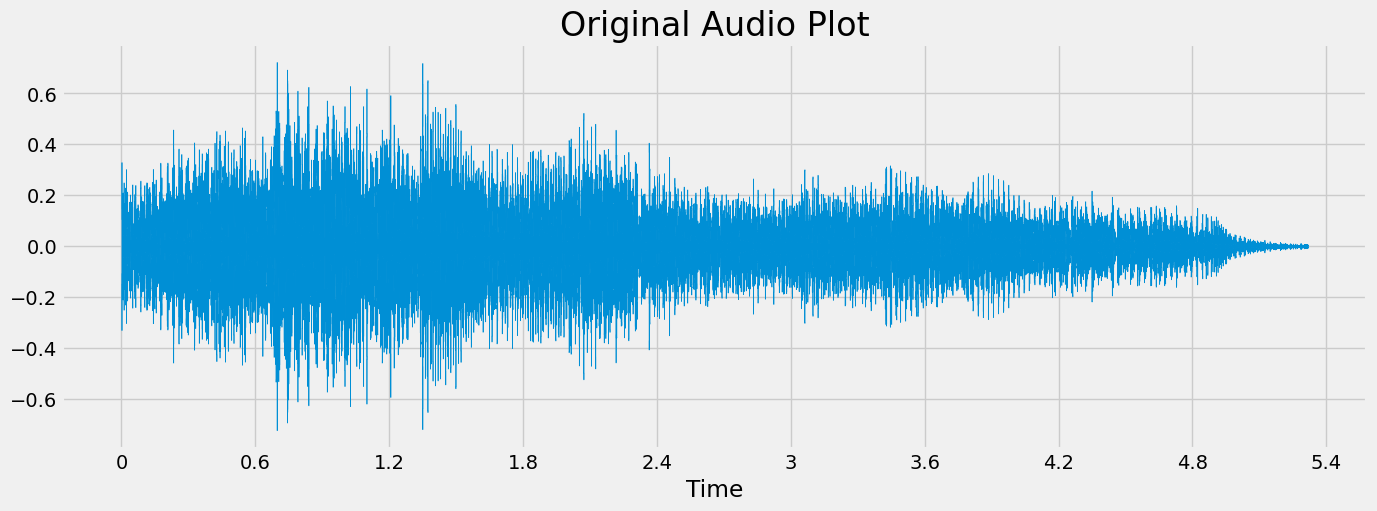

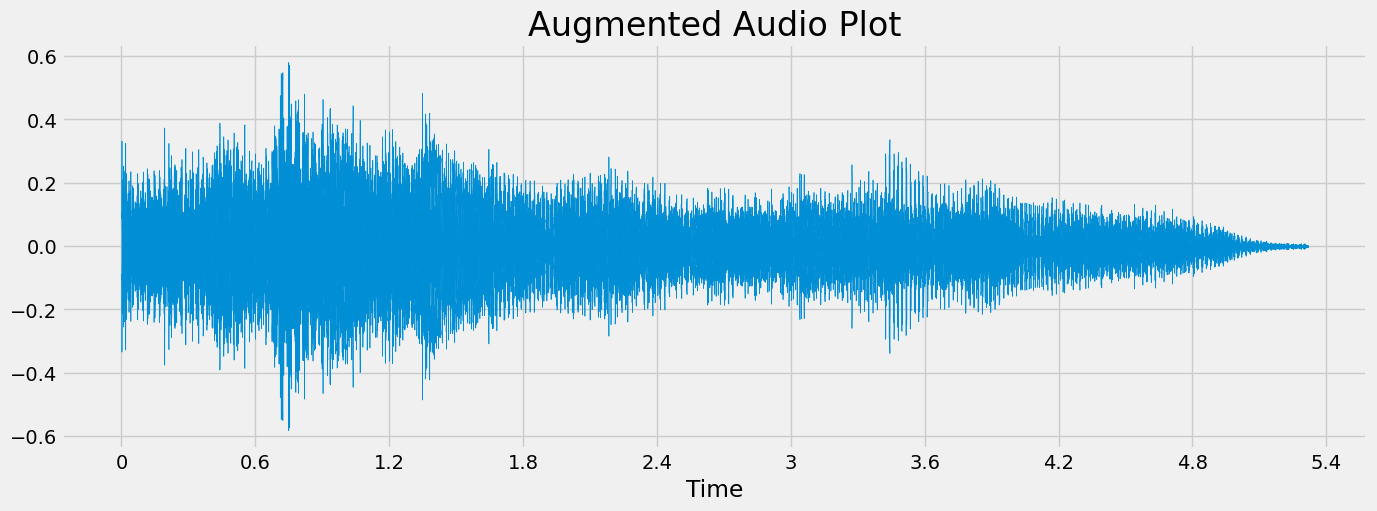

In [7]:
def pitch(data, sample_rate):
    """
    Pitch Tuning
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change = pitch_pm * 2 * (np.random.uniform())
    data = librosa.effects.pitch_shift(data.astype('float64'),
                                      n_steps=pitch_change,
                                      sr=sample_rate,
                                      bins_per_octave=bins_per_octave
                                      )
    return data

x = pitch(data, sampling_rate)
plt.figure(figsize=(15, 5))
# original plot
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Original Audio Plot', size=24)
plt.show()
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sampling_rate)
plt.title('Augmented Audio Plot', size=24)
plt.show()
ipd.Audio(x, rate=sampling_rate)


# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Dynamic Change</p></div>

**Dynamic change**, in the context of audio processing, refers to altering the intensity or loudness of a sound signal. This can involve increasing or decreasing the volume level of an audio clip. Dynamic changes are often used to enhance the expressiveness and clarity of audio recordings. For example, in music production, dynamic changes are employed to emphasize certain musical elements or to create a sense of dynamics and contrast within a piece. In speech processing, dynamic changes can help improve the intelligibility and overall quality of recorded speech.

In [8]:
def dyn_change(data):
    """
    Random value change
    """
    dyn_change = np.random.uniform(low = -0.5, high = 7)
    return data * dyn_change


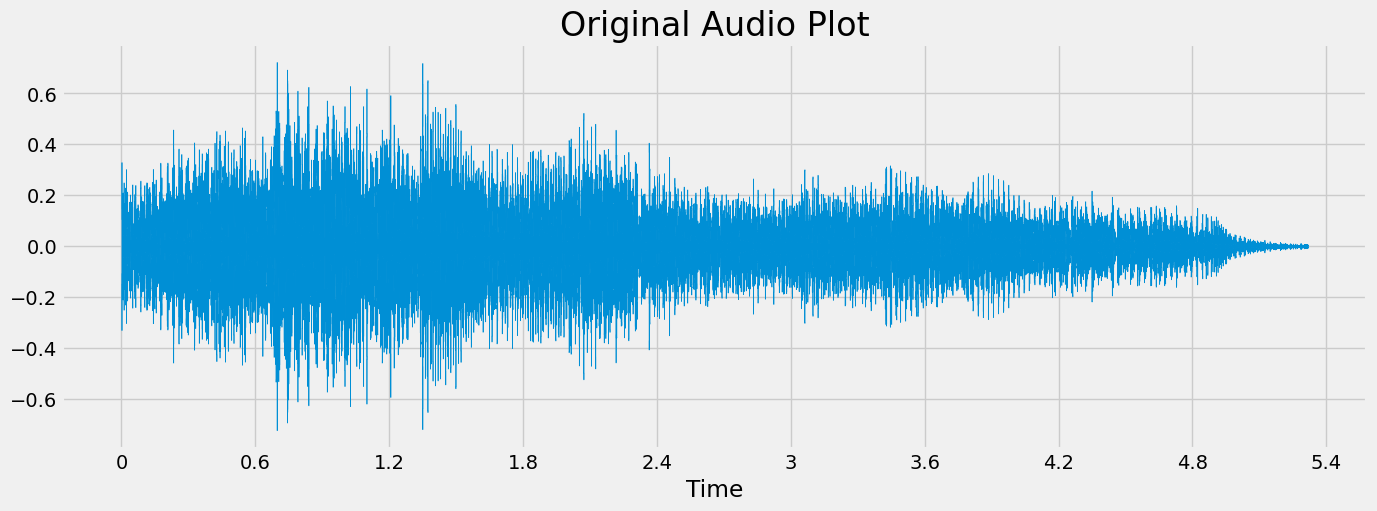

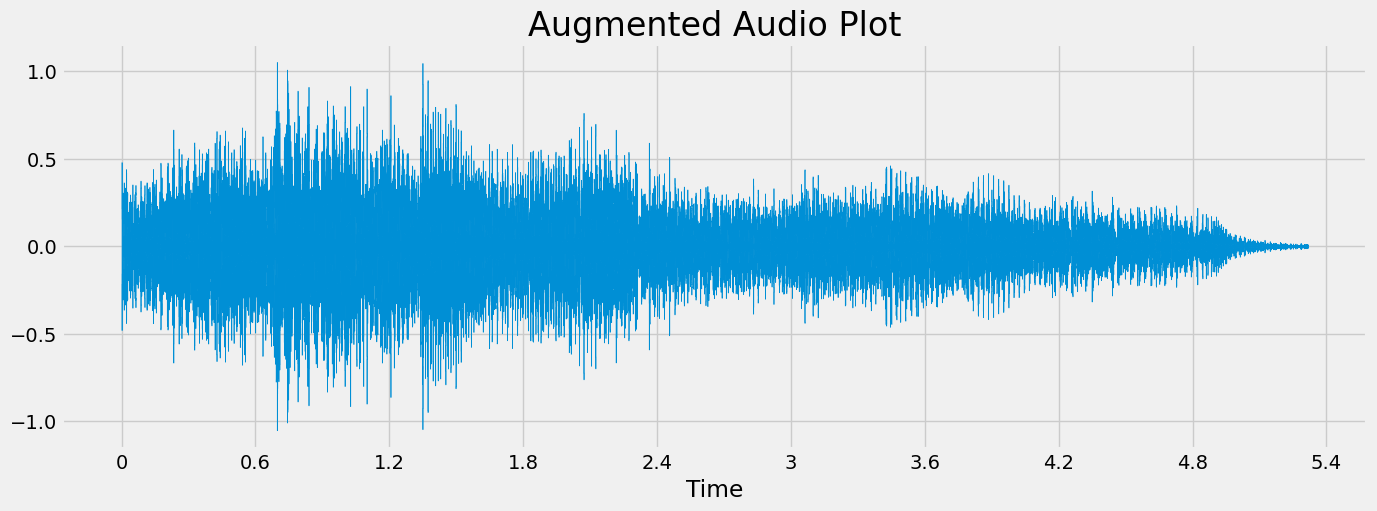

In [9]:
x = dyn_change(data)
plt.figure(figsize = (15, 5))
# orginial plot
librosa.display.waveshow(data, sr = sampling_rate)
plt.title('Original Audio Plot', size = 24)
plt.show()
plt.figure(figsize = (15, 5))
librosa.display.waveshow(x, sr = sampling_rate)
plt.title('Augmented Audio Plot', size = 24)
plt.show()
ipd.Audio(x, rate = sampling_rate)

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Speed and Pitch</p></div>

### Speed and pitch are two distinct aspects of audio:

**Speed:** Speed refers to the rate at which an audio signal is played back. Increasing the speed will make the audio play faster, while decreasing it will make it play slower. This can be used for various purposes, such as altering the tempo of a musical piece or adjusting the timing of a recorded speech.

**Pitch:** Pitch, on the other hand, is related to the perceived frequency of a sound. Higher frequencies are perceived as higher pitches, and lower frequencies as lower pitches. Pitch shifting involves altering the pitch of an audio signal without changing its duration. This is often done in music production to transpose a song to a different key or to create creative effects.

In summary, speed affects the duration of the audio, while pitch affects the perceived frequency. They are both important tools in audio processing and production.

In [10]:
def speedNpitch(data):
    """
    speed and Pitch Tuning
    """
    length_change = np.random.uniform(low = 0.8, high = 1)
    speed_fac = 1.2 / length_change 
    tmp = np.interp(np.arange(0, len(data), speed_fac), np.arange(0, len(data)), data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *=0
    data[0:minlen] = tmp[0:minlen]
    
    return data

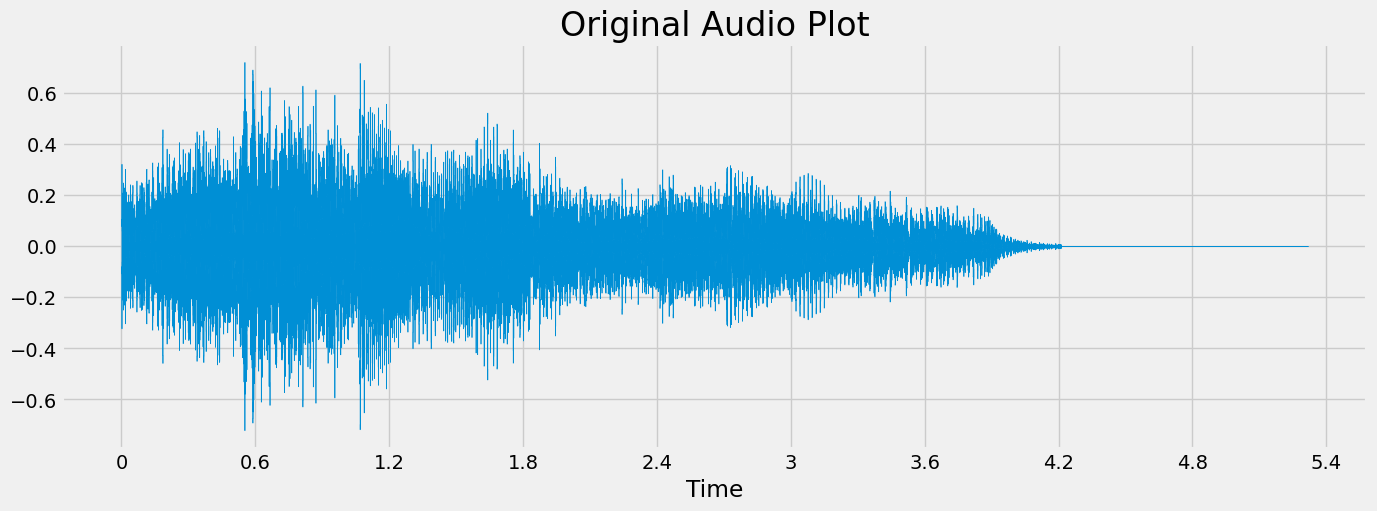

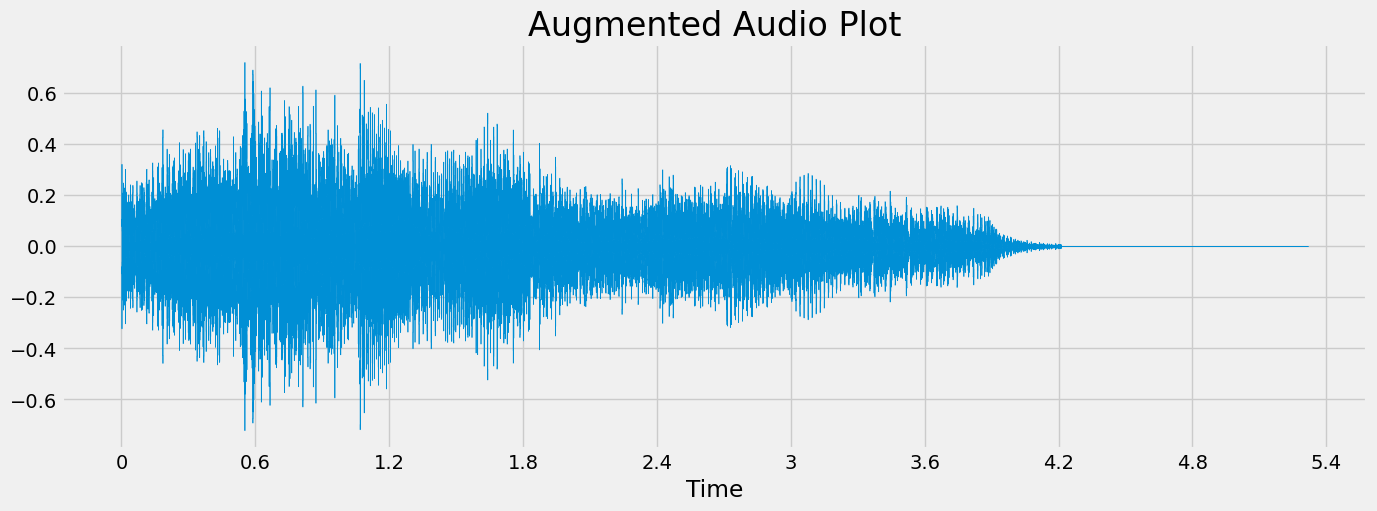

In [11]:
x = speedNpitch(data)
plt.figure(figsize = (15, 5))
# orginial plot
librosa.display.waveshow(data, sr = sampling_rate)
plt.title('Original Audio Plot', size = 24)
plt.show()
plt.figure(figsize = (15, 5))
librosa.display.waveshow(x, sr = sampling_rate)
plt.title('Augmented Audio Plot', size = 24)
plt.show()
ipd.Audio(x, rate = sampling_rate)